# Module 3 Code Challenge

## Overview

This assessment is designed to test your understanding of Module 3 material. It covers:

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

_Read the instructions carefully._ You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions, _please use your own words._ The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

---
## Part 1: Gradient Descent [Suggested Time: 20 min]
---

![best fit line](visuals/best_fit_line.png)

The best fit line that goes through the scatterplot up above can be generalized in the following equation: $$y = mx + b$$

Of all the possible lines, we can prove why that particular line was chosen using the plot down below:

![](visuals/cost_curve.png)

where RSS is defined as the residual sum of squares:

$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 

### 1.1) What is a more generalized name for the RSS curve above? How could a machine learning model use this curve?

In [ ]:
"""
The RSS curve can also be referred to as the cost (or loss) function.
A machine learning model can pick a random point on that curve, find the slope at that point, and use that to
gradually descend down toward the point with the lowest cost (where the slope equals 0).
"""

### 1.2) Would you rather choose a $m$ value of 0.08 or 0.05 from the RSS curve up above? Explain your reasoning.

In [ ]:
"""
I would choose an m value of 0.05 because that has a lower RSS value,
i.e. is closest to the minimum on the cost function.
"""

![](visuals/gd.png)

### 1.3) Using the gradient descent visual from above, explain why the distance between estimates in each step is getting smaller as more steps occur with gradient descent.

In [ ]:
"""
Since the gradient descent is calculated using the slope of the previous point, as the slopes decrease with each
successive step, so too will the distances between those steps.
"""

### 1.4) What does the learning rate do in the gradient descent algorithm? Explain how a very small and a very large learning rate would affect the gradient descent.

In [ ]:
"""
The learning rate allows you to descend more gradually toward the minimum. A very small learning rate will take too
long to reach the minimum, whereas a very large learning rate runs the risk of overshooting the minimum value.
"""

---
## Part 2: Logistic Regression [Suggested Time: 15 min]
---

### 2.1) Why is logistic regression typically better than linear regession for modeling a binary target/outcome?

In [ ]:
"""
Linear regression tries to fit a line to numerical/continuous data, with theoretical limits of negative and
positive infinity, whereas logistic regression uses a sigmoid curve to predict the probability of values being
in one category or another, i.e. a 0 or 1. 
"""

### 2.2) What is one advantage that logistic regression can have over other classification methods?

In [ ]:
"""
Logistic regression is generally more interpretable than other classification methods, albeit in terms of log-odds.
"""

---
## Part 3: Classification Metrics [Suggested Time: 20 min]
---

![cnf matrix](visuals/cnf_matrix.png)

### 3.1) Using the confusion matrix above, calculate precision, recall, and F-1 score.

Show your work, not just your final numeric answer

In [1]:
# Your code here to calculate precision
TP = 30
TN = 54
FP = 4
FN = 12

precision = TP / (TP+FP)
print(precision)

0.8823529411764706


In [2]:
# Your code here to calculate recall
recall = TP / (TP+FN)
print(recall)

0.7142857142857143


In [5]:
# Your code here to calculate F-1 score
f1 = 2 * ((precision*recall) / (precision+recall))
print(f1)

0.7894736842105262


<img src = "visuals/many_roc.png" width = "700">

### 3.2) Which ROC curve from the above graph is the best? Explain your reasoning. 

Note: each ROC curve represents one model, each labeled with the feature(s) inside each model.

In [ ]:
"""
The 'All Features' (pink) curve is the best because its AUC value is largest, i.e. closest to 1.
"""

### Logistic Regression Example

The following cell includes code to train and evaluate a model

In [6]:
# Run this cell without changes

# Include relevant imports
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

network_df = pickle.load(open('write_data/sample_network_data.pkl', 'rb'))

# partion features and target 
X = network_df.drop('Purchased', axis=1)
y = network_df['Purchased']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.956.


### 3.3) Explain how the distribution of `y` shown below could explain the very high accuracy score.

In [7]:
# Run this cell without changes

y.value_counts()

0    257
1     13
Name: Purchased, dtype: int64

In [11]:
## equivalent to 257 / (257+13)
1 - y.mean()

0.9518518518518518

In [ ]:
"""
The distribution of 'y' is very imbalanced, with a very low value for 1 as compared to 0,
so one could simply always predict 0 and have an accuracy score of 95.2%.
"""

### 3.4) What method could you use to address the issue discovered in Question 3.3? 

In [ ]:
"""
You could upsample the minority class (the values of '1') by adding samples (with replacement) of the minority class
until each class has an equal quantity (unless some other ratio is desired).
"""

---
## Part 4: Decision Trees [Suggested Time: 20 min]
---

### Concepts 
You're given a dataset of **30** elements, 15 of which belong to a positive class (denoted by *`+`* ) and 15 of which do not (denoted by `-`). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows that if we split by attribute A there are 13 items of the positive class and 2 of the negative class in one branch and 2 of the positive and 13 of the negative in the other branch. The right hand side shows that if we split the data by attribute B there are 8 items of the positive class and 7 of the negative class in one branch and 7 of the positive and 8 of the negative in the other branch.

<img src="visuals/decision_stump.png">

### 4.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node? 

It may be helpful to discuss splitting criteria.

In [ ]:
"""
Attribute 'A' results in a much better split of the data because it results in a lower impurity and entropy
than splitting on Attribute 'B'. Attribute 'B' results in an almost 50-50 split, which is exactly what you don't want.

You can use information gain to determine the best attribute to split a tree at each node. Information gain is
highest when the entropy of the split is lowest (i.e. the branches are farthest away from a 50-50 split).
"""

### Decision Tree Example

In this section, you will use decision trees to fit a classification model to the wine dataset. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [12]:
# Run this cell without changes

# Relevant imports 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
# Run this cell without changes
# Get the shape of the DataFrame 
df.shape

(178, 14)

In [14]:
# Run this cell without changes
# Get the distribution of the target variable 
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### 4.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.

In [16]:
# Replace None with appropriate code  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

### 4.3) Fit a decision tree model with scikit-learn to the training data. Use parameter defaults, except for `random_state=1`. Use the fitted classifier to generate predictions for the test data.

You can use the Scikit-learn DecisionTreeClassifier (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [18]:
# Your code here 
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

y_preds = d_tree.predict(X_test)

### 4.4) Obtain the accuracy score of the predictions on the test set. 

You can use the `sklearn.metrics` module.

In [19]:
# Your code imports here
from sklearn.metrics import accuracy_score

# Replace None with appropriate code 

print('Accuracy Score:', accuracy_score(y_test, y_preds))

Accuracy Score: 0.8764044943820225


### 4.5) Produce a confusion matrix for the predictions on the test set. 

You can use the `sklearn.metrics` module.

In [20]:
# Your code imports here
from sklearn.metrics import confusion_matrix

# Your code here 
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[27  6  0]
 [ 2 30  2]
 [ 0  1 21]]


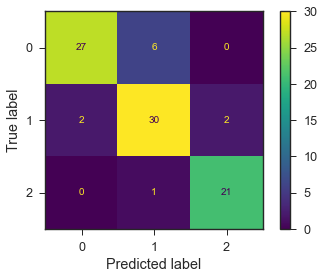

In [24]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
sns.set_style('ticks')

plot_confusion_matrix(d_tree, X_test, y_test)
plt.show()

### 4.6) Do the accuracy score or confusion matrix reveal any substantial problems with this model's performance? Explain your answer.

In [ ]:
"""
The confusion matrix shows that whichever class that is labeled as '1' seems to be giving this model the most trouble.
This model generally tends to overpredict class '1' or miss wines that are actually class '1'.
"""